# ABM-SD Integrated Model

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, 
                             max_error, median_absolute_error)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from copy import deepcopy
%matplotlib inline
import operator
from IPython.display import display, clear_output

# Data Preparation


<ul>
<li>We use supervised machine learning because we have labeled data (from the ABM).</li>
<li>We also use a regressor because our main inputs are recycling, wishcycling and trash (in kg).</li>
<li>Following Vadhati et al. and common machine learning knowledge we use 4 different models: random forest, KNN,
SVM and a neural network (MLP Regressor).</li>
</ul>

In [8]:
df_abm = pd.read_csv("/Users/ssethura/Desktop/PCEM/SobolBatchRun_0717.csv")
df_abm = df_abm.loc[df_abm["Year"] == 31]
df_abm = df_abm[df_abm["scenario"] == "Oregon"]
df_abm = df_abm.filter(["x_0", "x_1", "x_2", "x_3", "x_4", "x_5", "recycling", "trash", "wishcycling"], axis=1)

X = df_abm.filter(["x_0", "x_1", "x_2", "x_3", "x_4", "x_5"], axis=1)
y_variable = {'recycling': df_abm['recycling'], 'trash': df_abm['trash'], 
              'wishcycling': df_abm['wishcycling']}
y = y_variable['recycling']

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Loops through different ML models and hyperparameters

In [116]:
#For r2_score --> value close to 1 is good 0 or negative is not good (compare to the case where we use
#the mean of the data as a model!) so here it is close to zero which mean the model is not better than 
# using the mean! (expected as data are random)
#Mean absolute error = average(|predicted - real|) so here the average error is 25%
#Mean squared error = average(predicted - real)^2) value closer to zero are best
#explained_variance_score is close to R2 but account for mean error. Comparing R2 and this tells us if the model
#is biased or not (has a high mean of error)

# Next 3 lines check if we need a hig number of replicates (answer is yes) (indent rest of the code when using it):
# pv_abm_deep_copy = deepcopy(pv_abm)
# for i in range(number_files):
    # pv_abm = pv_abm_deep_copy.head(round(pv_abm_deep_copy.shape[0]/(number_files - i)))
test_ml_algorithm = True
if test_ml_algorithm:
    hyperparameter_1 = [2, 3]
    hyperparameter_2 = [2, 3]
    total_scores = []
    name_model = []
    for i in range(len(hyperparameter_1)):
        for j in range(len(hyperparameter_2)):
            rfr = RandomForestRegressor(n_estimators=100*hyperparameter_1[i], max_depth=2*hyperparameter_2[j])
            svr = svm.SVR(gamma='scale', C=0.5*hyperparameter_1[i], epsilon=0.05*hyperparameter_2[j])
            mlpr = MLPRegressor(hidden_layer_sizes=(30*hyperparameter_1[i],
                                                    30*hyperparameter_1[i],30*hyperparameter_1[i], 30*hyperparameter_1[i]), 
                               max_iter=1000*hyperparameter_2[j])
            knn = KNeighborsRegressor(n_neighbors=int(round(2*hyperparameter_1[i])))
            models = {'Random forest': rfr, 'Support vector machine': svr, 'Neural network': mlpr, 
                      'K-nearest neighbors': knn}
            results_r2_mean = dict.fromkeys(['Random forest', 'Support vector machine', 'Neural network', 
                                                 'K-nearest neighbors'])
            results_r2_std = dict.fromkeys(['Random forest', 'Support vector machine', 'Neural network', 
                                                 'K-nearest neighbors'])
            for key in models.keys():
                score_mean = cross_val_score(models[key], X, y, cv=10, scoring="r2").mean()
                score_std = cross_val_score(models[key], X, y, cv=10, scoring="r2").std()
                results_r2_mean[key] = score_mean
                total_scores.append(score_mean)
                name_model.append(key)
                results_r2_std[key] = score_std
                #all_scores.update(key = score_mean)
            best_model = max(results_r2_mean.items(), key=operator.itemgetter(1))[0]
            lowest_variance = max(results_r2_std.items(), key=operator.itemgetter(1))[0]
            print("Results with hyperparameter_1 = ", hyperparameter_1[i], " and ", 
                  "hyperparameter_2 = ", hyperparameter_2[j])
            print(results_r2_mean, results_r2_std)
            print("Best model for mean R2", best_model, results_r2_mean[best_model])
            print("Model with lowest std R2", lowest_variance, results_r2_std[lowest_variance])
    best_model_total = max(total_scores)
    index = total_scores.index(best_model_total)
    print("The best model is ", name_model[index], " with a mean R2 of ", best_model_total)

Results with hyperparameter_1 =  2  and  hyperparameter_2 =  2
{'Random forest': 0.8769971926134306, 'Support vector machine': -0.07047185129859819, 'Neural network': 0.7982637178046162, 'K-nearest neighbors': 0.8589331838093454} {'Random forest': 0.028009646997191297, 'Support vector machine': 0.1472290361950615, 'Neural network': 0.07147411727598614, 'K-nearest neighbors': 0.04070486422435861}
Best model for mean R2 Random forest 0.8769971926134306
Model with lowest std R2 Support vector machine 0.1472290361950615
Results with hyperparameter_1 =  2  and  hyperparameter_2 =  3
{'Random forest': 0.9263034077528681, 'Support vector machine': -0.15645943712823016, 'Neural network': 0.8181970007932774, 'K-nearest neighbors': 0.8589331838093454} {'Random forest': 0.01992832563980027, 'Support vector machine': 0.1431817519659826, 'Neural network': 0.06755997640283164, 'K-nearest neighbors': 0.04070486422435861}
Best model for mean R2 Random forest 0.9263034077528681
Model with lowest std R2

# Fine tune selected model

In [117]:
# From previous select the best model and fine tune parameters:
fine_tune = True
if fine_tune:
    hyperparameter_1 = range(1, 5)
    hyperparameter_2 = range(1, 2)
    scores_fine_tune = []
    hyperparameters = []
    count=0
    for i in range(len(hyperparameter_1)):
        for j in range(len(hyperparameter_2)):
            #model = RandomForestRegressor(n_estimators=100*hyperparameter_1[i], max_depth=2*hyperparameter_2[j])
            #model = svm.SVR(gamma='scale', C=0.5*hyperparameter_1[i], epsilon=0.05*hyperparameter_2[j])
            #model = KNeighborsRegressor(n_neighbors=int(round(2*hyperparameter_1[i])))
            model = MLPRegressor(hidden_layer_sizes=(30*hyperparameter_1[i], 30*hyperparameter_1[i],30*hyperparameter_1[i],
                                                     30*hyperparameter_1[i]), max_iter=1000*hyperparameter_2[j])
            #model = MLPRegressor(hidden_layer_sizes=(10*hyperparameter_1[i],10*hyperparameter_1[i],
             #                                        10*hyperparameter_1[i]), max_iter=250*hyperparameter_2[j])
            score_mean = cross_val_score(model, X, y, cv=5, scoring="r2").mean()
            scores_fine_tune.append(score_mean)
            hyperparameters.append([i, j])
            count += 1
            clear_output(wait=True)
            print('loop ', count, ' out of ', len(hyperparameter_1)*len(hyperparameter_2))
    model_fine_tune = max(scores_fine_tune)
    index2 = scores_fine_tune.index(model_fine_tune)
    print("The model is fine tune with hyperparameter_1 ", hyperparameter_1[hyperparameters[index2][0]], 
          " and hyperparameter_2 ", hyperparameter_2[hyperparameters[index2][1]], " with a mean R2 of ", model_fine_tune)

loop  4  out of  4
The model is fine tune with hyperparameter_1  4  and hyperparameter_2  1  with a mean R2 of  0.8913822349060876


In [3]:
#MLP REGRESSOR
grid_search = True
if grid_search:
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'hidden_layer_sizes': [(7, 25, 120, 100), (100, 100, 100, 100), (50,100,50), (120,100,50), (100,50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'], 
        'warm_start': [True, False]}
    gsc = GridSearchCV(estimator=MLPRegressor(max_iter=2000), param_grid=parameter_space, cv=10, 
                       scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    gsc.fit(X_train, y_train)
    print('Best parameters found:\n', gsc.best_params_)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam', 'warm_start': False}


In [4]:
# we verify our fine tune model:
#model = RandomForestRegressor(n_estimators=400, max_depth=10)
#model = svm.SVR(gamma='scale', C=1.5, epsilon=0.05)
#model = KNeighborsRegressor(n_neighbors=18)
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import SCORERS
model = MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', alpha=0.05, learning_rate='constant', 
                     solver='adam', warm_start=False, max_iter=2000, random_state=101)
#model = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=500)
print("Mean R2 Y", cross_val_score(model, X, y, cv=10, scoring="r2").mean(),
      "Standard deviation R2", cross_val_score(model, X, y, cv=10, scoring="r2").std(), 
     "Mean mean square error Y", cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error").mean())

Mean R2 Y 0.9741899584128291 Standard deviation R2 0.00700340141345901 Mean mean square error Y -6.704098118193204e-05


In [9]:
#RANDOM FOREST
grid_search = True
if grid_search:
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]}
    
    rf = RandomForestRegressor(random_state = 42)

    gsc = GridSearchCV(estimator=rf, param_grid=parameter_space, cv=10, 
                       scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    gsc.fit(X_train, y_train)
    print('Best parameters found:\n', gsc.best_params_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best parameters found:
 {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [10]:
# we verify our fine tune model:
model = RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split = 8, bootstrap = True)
#model = svm.SVR(gamma='scale', C=1.5, epsilon=0.05)
#model = KNeighborsRegressor(n_neighbors=18)
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import SCORERS
#model = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=500)
print("Mean R2 Y", cross_val_score(model, X, y, cv=10, scoring="r2").mean(),
      "Standard deviation R2", cross_val_score(model, X, y, cv=10, scoring="r2").std(), 
     "Mean mean square error Y", cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error").mean())

Mean R2 Y 0.7480720549079637 Standard deviation R2 0.09339423175216345 Mean mean square error Y -0.0001016083263594511


In [122]:
#SVM
grid_search = True
if grid_search:
    from sklearn.model_selection import GridSearchCV
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    
    supportVM = svm.SVR()
    
    gsc = GridSearchCV(estimator=supportVM, param_grid = param_grid, 
                          cv =10, n_jobs = -1, verbose = 1, scoring='neg_mean_squared_error')

    gsc.fit(X_train, y_train)
    print('Best parameters found:\n', gsc.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best parameters found:
 {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [123]:
# we verify our fine tune model:
#model = RandomForestRegressor(n_estimators=400, max_depth=10)
model = svm.SVR(gamma=0.0001, C=1000, epsilon=0.05, kernel='rbf')
#model = KNeighborsRegressor(n_neighbors=18)
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import SCORERS
#model = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=500)
print("Mean R2 Y", cross_val_score(model, X, y, cv=10, scoring="r2").mean(),
      "Standard deviation R2", cross_val_score(model, X, y, cv=10, scoring="r2").std(), 
     "Mean mean square error Y", cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error").mean())

Mean R2 Y 0.727355457425466 Standard deviation R2 0.06119765775641782 Mean mean square error Y -0.0006892035520446826


In [124]:
#KNN

grid_search = True
if grid_search:
    from sklearn.model_selection import GridSearchCV
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    
    kNearest = knn
    
    gsc = GridSearchCV(kNearest, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)

    gsc.fit(X_train, y_train)
    print('Best parameters found:\n', gsc.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best parameters found:
 {'n_neighbors': 10}


In [125]:
# we verify our fine tune model:
#model = RandomForestRegressor(n_estimators=400, max_depth=10)
#model = svm.SVR(gamma='scale', C=1.5, epsilon=0.05)
model = KNeighborsRegressor(n_neighbors=6)
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import SCORERS
#model = MLPRegressor(hidden_layer_sizes=(20,20,20), max_iter=500)
print("Mean R2 Y", cross_val_score(model, X, y, cv=10, scoring="r2").mean(),
      "Standard deviation R2", cross_val_score(model, X, y, cv=10, scoring="r2").std(), 
     "Mean mean square error Y", cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error").mean())

Mean R2 Y 0.8669960135616839 Standard deviation R2 0.036054829478462384 Mean mean square error Y -0.0003470271919844487


# Predictions:

In [11]:
#we use the model on new data:
import time
import statistics
ynew_list = []
for parameter in range(1):
    for i in range(10):
        Xnew = [[0.5, 0.7, 0.9, -0.5, 0.2, 0.2]]
        #Important step:
        #rfr.fit(X, y)
        model = RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split = 8, bootstrap = True)
        #model = svm.SVR(gamma='scale',C=2, epsilon=0.15) - create a random forest model here 
        # t0 = time.time()
        model.fit(X, y)
        Xnew = sc.transform(Xnew)
        #ynew = rfr.predict(Xnew)
        ynew = model.predict(Xnew)
        # t1 = time.time()
        # print(t1 - t0)
        ynew_list.append(ynew[0])
    #print(parameter, sum(ynew_list)/len(ynew_list))
    print(ynew_list, sum(ynew_list)/len(ynew_list), statistics.stdev(ynew_list))

/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with featur

[0.39668829760203766, 0.3969840801230395, 0.39689726857964336, 0.39667455739347185, 0.3973361308408133, 0.3964207195108754, 0.396880298478028, 0.39683767942996806, 0.39677392157709584, 0.3971047209312791] 0.3968597674466252 0.00025133663741973034


/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.analyze import delta
from SALib.analyze import morris
from SALib.test_functions import Ishigami
problem = {
        'num_vars': 6,
        'names': ["sn","pbc","kn","ds", "att", "bin"],
        'bounds': [[0,1], [0, 1], [0, 1], [-1,0], [0,1], [0,1]]}
X_pred = saltelli.sample(problem, 1000)
#X_pred = sc.fit_transform(X_pred)
sobol_analysis = True
if sobol_analysis:
    result_array = np.empty((0, 8))
    count = 0
    replicates = 1
    for i in range(replicates):
        model.fit(X, y)
        for i in range(X_pred.shape[0]):
            Xnew = [[X_pred[i][0], X_pred[i][1], X_pred[i][2], X_pred[i][3], X_pred[i][4], X_pred[i][5]]]
            Xnew = sc.transform(Xnew)
            #ynew = rfr.predict(Xnew)
            ynew = model.predict(Xnew)
            result_array = np.append(result_array, [[i, X_pred[i][0], X_pred[i][1], X_pred[i][2], X_pred[i][3], X_pred[i][4], X_pred[i][5],
                                                     float(ynew)]], axis=0)
            count += 1
            clear_output(wait=True)
            print('loop ', count, ' out of ', replicates * X_pred.shape[0])
    var_names = np.array(['index', "sn","pbc","kn","ds", "att", "bin", 'Y'])
    result_array =  np.vstack((var_names, result_array))
    data_out2 = pd.DataFrame(data=result_array[1:,1:], columns=result_array[0,1:])
    data_out2.to_csv("Data_out2.csv")

loop  14000  out of  14000


# Analysis:

['Y' '0.3871567786592774' '0.38784964363908564' ... '0.41418314095278264'
 '0.42704966385843157' '0.4174467993170268']
           ST   ST_conf
sn   0.387339  0.036623
pbc  0.124116  0.013037
kn   0.057672  0.005796
ds   0.207220  0.024462
att  0.075381  0.008501
bin  0.214206  0.020196
           S1   S1_conf
sn   0.379852  0.044202
pbc  0.103130  0.031827
kn   0.057221  0.021266
ds   0.175073  0.040067
att  0.061020  0.026615
bin  0.193965  0.037486
                  S2   S2_conf
(sn, pbc)  -0.016082  0.069158
(sn, kn)   -0.021486  0.069347
(sn, ds)   -0.000417  0.081359
(sn, att)  -0.015395  0.070994
(sn, bin)  -0.023438  0.073992
(pbc, kn)   0.004404  0.045718
(pbc, ds)   0.007552  0.050525
(pbc, att)  0.004274  0.049600
(pbc, bin)  0.008107  0.049364
(kn, ds)   -0.000338  0.032962
(kn, att)  -0.001351  0.033893
(kn, bin)   0.001408  0.032842
(ds, att)   0.012717  0.056950
(ds, bin)   0.009742  0.062805
(att, bin)  0.004260  0.039056


/var/folders/cl/ht35wqfd3k59fxyg0r8rkrfdkf38cq/T/ipykernel_73441/3540798743.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_analysis = np.array(np.delete(Y_analysis, 0)).astype(np.float)
/var/folders/cl/ht35wqfd3k59fxyg0r8rkrfdkf38cq/T/ipykernel_73441/3540798743.py:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
/var/folders/cl/ht35wqfd3k59fxyg0r8rkrfdkf38cq/T/ipykernel_73441/3540798743.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argumen

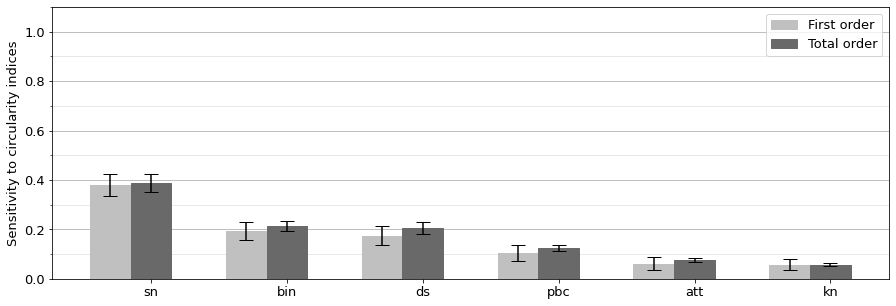

In [13]:
Y_analysis = result_array[:, -1]
print(Y_analysis)
Y_analysis = np.array(np.delete(Y_analysis, 0)).astype(np.float)
#print(sobol_abm_5['Y'].to_numpy()) sobol_abm_5['Y'].to_numpy() instead of Y_analysis below
Si = sobol.analyze(problem, Y_analysis, print_to_console=True)
# Negative value are wrong. If so use delta or morris analysis
# or use: So to center the output, is it considered best practice to: 
# (1) subtract the mean, (2) subtract the median, or (3) do (Y - mean) / std as above?
# we may also use Shapley values or something else from the ML output analysis!
# The indices have converged, but some of them are numerically zero. For the negative values, check to see whether 
# their confidence intervals include zero-- if so, you can safely treat them as zero.
# Generally speaking, the most sensitive parameters should have narrow confidence intervals, which are less 
# than 10% of the sensitivity indices (doi: 10.1002/psp4.6)
# Confidence interval is one-sided
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)
barWidth = 0.3
bars1 = list(Si["S1"])
bars2 = list(Si["ST"])
err1 = list(Si["S1_conf"])
err2 = list(Si["ST_conf"])
labels = ["sn","pbc","kn","ds", "att", "bin"]

df = pd.DataFrame(list(zip(bars1, bars2, err1, err2, labels)), columns=['bars1', 'bars2', 'err1', 'err2', 'labels'])
df = df.sort_values('bars1', ascending=False)
bars1 = df['bars1'].to_list()
bars2 = df['bars2'].to_list()
err1 = df['err1'].to_list()
err2 = df['err2'].to_list()
labels = df['labels'].to_list()

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(1, 1)
ax.grid(zorder=0)
ax.xaxis.grid(False)
ax.bar(r1, bars1, width = barWidth, color = 'silver', edgecolor = 'silver', yerr=err1, capsize=7, label='First order', 
      zorder=3)
ax.bar(r2, bars2, width = barWidth, color = 'dimgrey', edgecolor = 'dimgrey', yerr=err2, capsize=7, 
        label='Total order', zorder=3)
from textwrap import wrap

labels = [ '\n'.join(wrap(l, 19)) for l in labels ]
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
plt.ylabel('Sensitivity to circularity indices')
plt.legend(fontsize=13)
import matplotlib as mpl
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
#ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
ax.set_ylim(0, 1.1)
plt.savefig("SobolIndicesMomentSensitivityAnalysis.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)
SA_results = pd.DataFrame.from_dict(Si, orient='index')
SA_results.columns = ["sn","pbc","kn","ds", "att", "bin"]
SA_results = SA_results.T
#print(SA_results.columns.tolist())
#SA_results.drop(['S2', 'S2_conf'], axis=1)
#SA_results = SA_results.astype(float)
SA_results.head()
SA_results.to_csv("SA_results_0714.csv")

In [129]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.analyze import delta
from SALib.analyze import morris
from SALib.test_functions import Ishigami
problem = {
        'num_vars': 2,
        'names': ["cutting_costs", "transport_cost_segments"],
        'bounds': [[0, 132], [0, 0.53]]}
X_pred = saltelli.sample(problem, 1000)
#X_pred = sc.fit_transform(X_pred)
sobol_analysis = True
if sobol_analysis:
    result_array = np.empty((0, 4))
    count = 0
    replicates = 1
    for i in range(replicates):
        model.fit(X, y)
        for i in range(X_pred.shape[0]):
            Xnew = [[X_pred[i][0], X_pred[i][1], 0]]
            Xnew = sc.transform(Xnew)
            #ynew = rfr.predict(Xnew)
            ynew = model.predict(Xnew)
            result_array = np.append(result_array, [[i, X_pred[i][0], X_pred[i][1], 
                                                     float(ynew)]], axis=0)
            count += 1
            clear_output(wait=True)
            print('loop ', count, ' out of ', replicates * X_pred.shape[0])
    var_names = np.array(['index', "cutting_costs", "transport_cost_segments", 'Y'])
    result_array =  np.vstack((var_names, result_array))
    data_out2 = pd.DataFrame(data=result_array[1:,1:], columns=result_array[0,1:])
    data_out2.to_csv("Data_out2.csv")

/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
/Users/ssethura/opt/anaconda3/envs/pcem/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 7 features as input.

In [ ]:
already_analyzed = False
Y_analysis = result_array[:, -1]
Y_analysis = np.array(np.delete(Y_analysis, 0)).astype(np.float)
print(X_pred.shape, len(Y_analysis))
if not already_analyzed:
    Si = delta.analyze(problem, X_pred, Y_analysis, print_to_console=True)

(6000, 2) 6000
Parameter delta delta_conf S1 S1_conf
cutting_costs 0.896410 0.001684 0.996953 0.000113
transport_cost_segments 0.014048 0.005539 0.000763 0.002820


[0.8964102052525562, 0.014048496029480398] 0.9104587012820367


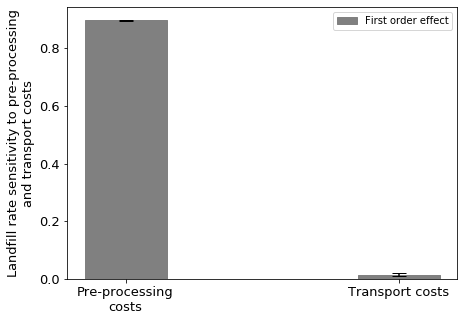

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5
barWidth = 0.3
bars1 = list(Si["delta"])
print(bars1, sum(bars1))
err1 = list(Si["delta_conf"])
labels = ["Pre-processing costs", "Transport costs"]

df = pd.DataFrame(list(zip(bars1, err1, labels)), columns=['bars1', 'err1', 'labels'])
df = df.sort_values('bars1', ascending=False)
bars1 = df['bars1'].to_list()
err1 = df['err1'].to_list()
labels = df['labels'].to_list()

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, width = barWidth, color = 'grey', edgecolor = 'grey', yerr=err1, capsize=7, 
        label='First order effect')
#plt.xticks([r + barWidth for r in range(len(bars1))], ["cutting_costs", "transport_cost_segments", "cost_red"])
#plt.ylabel('Delta score')

labels = [ '\n'.join(wrap(l, 19)) for l in labels ]
plt.xticks([r for r in range(len(bars1))], labels)
labels2 = ['Landfill rate sensitivity to pre-processing and transport costs']
labels2 = [ '\n'.join(wrap(l2, 45)) for l2 in labels2 ]
plt.ylabel(labels2[0])

plt.legend()
plt.savefig("DeltaMomentSensitivityAnalysis.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)
#with open('DeltaSAresults.csv', 'w') as output:
 #   writer = csv.writer(output)
  #  for key, value in Si.items():
   #     writer.writerow([key, value])

# Isopleth

In [ ]:
result_array = np.empty((0, 4))
count=0
for i in np.linspace(0, 1, 100):
    for j in np.linspace(0, 1, 100):
        i_b = 0.7 + j * 0.3
        j1 = 0.7 + j * 0.3
        j2 = i * 2080
        Xnew = [[i_b, j1, j2]]
        Xnew = sc.transform(Xnew)
        #ynew = rfr.predict(Xnew)
        ynew = model.predict(Xnew)
        result_array = np.append(result_array, [[i*j, i, j, float(ynew)]], axis=0)
        count += 1
        clear_output(wait=True)
        print('loop ', count, ' out of ', len(np.linspace(0, 1, 100))*len(np.linspace(0, 1, 100)))
var_names = np.array(['index', 'Recycling costs', 'Landfill costs', 'Recycling rate'])
result_array =  np.vstack((var_names, result_array))
data_out3 = pd.DataFrame(data=result_array[1:,1:], columns=result_array[0,1:])
data_out3.to_csv("Data_out9.csv")

loop  10000  out of  10000


C:\Users\jwalzber\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


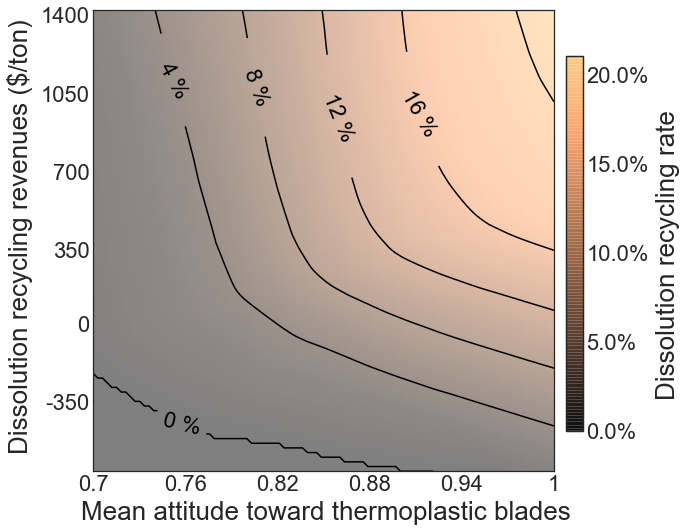

In [ ]:
#sns.set(style="whitegrid", font_scale=1.6, color_codes=True)
from pylab import rcParams
import matplotlib.ticker as mtick
import textwrap
#print(data_in)
plt.style.use('seaborn-white')

#def f(x, y):
 #   return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#x = np.linspace(0, 5, 500)
#y = np.linspace(0, 5, 400)

#X, Y = np.meshgrid(x, y)
#Z = f(X, Y)
#.ravel().tolist()
data_in = pd.read_csv("Data_out9.csv")
# NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
#data_in["Recycling costs"] = (((data_in["Recycling costs"] - data_in["Recycling costs"].min()) * (1 - 0.8)) 
 #                            / (data_in["Recycling costs"].max() - data_in["Recycling costs"].min()) + 0.8)
#data_in["Landfill costs"] = (((data_in["Recycling costs"] - data_in["Recycling costs"].min()) * (28 - 0)) 
 #                            / (data_in["Recycling costs"].max() - data_in["Recycling costs"].min()) + 0)
x = data_in["Recycling costs"].unique()
y = data_in["Landfill costs"].unique()
#x = -x
X, Y = np.meshgrid(x, y)  # np.meshgrid switch x and y so x axis is Y data and y axis is X data
# normalize data to avoid prediction below 0% or above 100%

# normalize data to avoid prediction below 0% or above 100%
normalize = False
if (sum(data_in["Recycling rate"] < 0) > 0 or sum(data_in["Recycling rate"] > 1) > 0) and normalize:
    if sum(data_in["Recycling rate"] > 1) > 0 and sum(data_in["Recycling rate"] < 0) > 0:
        print('Normalized data_in to 0-1')
        data_in["Recycling rate"] = ((data_in["Recycling rate"] - data_in["Recycling rate"].min()) 
                             / (data_in["Recycling rate"].max() - data_in["Recycling rate"].min()))
    elif sum(data_in["Recycling rate"] < 0) > 0:
        print('Normalized data_in to 0-max')
        data_in["Recycling rate"] = ((data_in["Recycling rate"] - data_in["Recycling rate"].min()) 
                                 / (data_in["Recycling rate"].max() - data_in["Recycling rate"].min()) * 
                                 data_in["Recycling rate"].max())
    elif sum(data_in["Recycling rate"] > 1) > 0:
    # The general one-line formula to linearly rescale data values having observed min and max into a 
    # new arbitrary range min' to max' is: 
    # newvalue= (max'-min')/(max-min)*(value-max)+max' or:
    # newvalue= (max'-min')/(max-min)*(value-min)+min'.
        print('Normalized data_in to min-1')
        data_in["Recycling rate"] = ((1 - data_in["Recycling rate"].min()) / 
                                     (data_in["Recycling rate"].max() - data_in["Recycling rate"].min()) 
                                     * (data_in["Recycling rate"] - data_in["Recycling rate"].max()) + 1)
#data_in[data_in["Recycling rate"] < 0] = 0
data_in["Recycling rate"][data_in["Recycling rate"] < 0] = 0
data_in.to_csv("test.csv")
Z = data_in["Recycling rate"].values * 100 #* 0.8036
Z = Z.reshape((len(x), len(y)))

# HERE: normalize z from 0 to 100

class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()

#figure, axes = plt.subplots(nrows=3, ncols=3)
fig = plt.figure(figsize=(8, 4))
num=0
for i in range(1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(1,1, num)
 
    if plt.rcParams["text.usetex"]:
        fmt = r'%r \%%'
    else:
        fmt = '%r %%'

    # Plot the lineplot
    if num == 1:
        CS = plt.contour(X, Y, Z, 5, colors='black')
        CS.levels = [nf(val) for val in CS.levels]
        im = plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',
               cmap='copper', alpha=0.5)
        #plt.clabel(CS, CS.levels, fmt='%1.0f', inline=True, fontsize=22)
        plt.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=22)
        
        #x_values = [0.11, 0.11]
        #y_values = [0, 1]
        #plt.plot(x_values, y_values, color='red', linestyle='dashed')
        #x_values2 = [0, 1]
        #y_values2 = [0.88, 0.88]
        #plt.plot(x_values2, y_values2, color='red', linestyle='dashed')
        #x_values3 = [0.997, 0.997]
        #y_values3 = [0, 1]
        #plt.plot(x_values3, y_values3, color='red', linestyle='dashed')
        #x_values4 = [0, 1]
        #y_values4 = [0.21, 0.21]
        #plt.plot(x_values4, y_values4, color='red', linestyle='dashed')
        
    elif num == 2:
        CS2 = plt.contour(X2, Y2, Z2, 5, colors='black')
        CS2.levels = [nf(val) for val in CS2.levels]
        im = plt.imshow(Z2, extent=[0, 1, 0, 1], origin='lower',
               cmap='coolwarm', alpha=0.5, vmin=0, vmax=100)
        plt.clabel(CS2, CS2.levels, fmt=fmt, inline=True, fontsize=9)
    elif num == 3:
        CS3 = plt.contour(X3, Y3, Z3, 5, colors='black')
        CS3.levels = [nf(val) for val in CS3.levels]
        im = plt.imshow(Z3, extent=[0, 1, 0, 1], origin='lower',
               cmap='coolwarm', alpha=0.5, vmin=0, vmax=100)
        plt.clabel(CS3, CS3.levels, fmt=fmt, inline=True, fontsize=9)
    elif num == 4:
        CS4 = plt.contour(X4, Y4, Z4, 5, colors='black')
        CS4.levels = [nf(val) for val in CS4.levels]
        im = plt.imshow(Z4, extent=[0, 1, 0, 1], origin='lower',
               cmap='coolwarm', alpha=0.5, vmin=0, vmax=100)
        plt.clabel(CS4, CS4.levels, fmt=fmt, inline=True, fontsize=9)
    else:
        CS5 = plt.contour(X5, Y5, Z5, 5, colors='black')
        CS5.levels = [nf(val) for val in CS5.levels]
        im = plt.imshow(Z5, extent=[0, 1, 0, 1], origin='lower',
               cmap='coolwarm', alpha=0.5, vmin=0, vmax=100)
        plt.clabel(CS5, CS5.levels, fmt=fmt, inline=True, fontsize=9)

    #plt.axis(aspect='image')
 
    # Same limits for everybody!
    plt.xlim(0,1)
    plt.ylim(0,1)
    # np.meshgrid switch x and y so x axis is Y data and y axis is X data so label of x axis needs to 
    # correspond to Y data and label of y axis to X data
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], [0.7, 0.76, 0.82, 0.88, 0.94, 1])
    plt.yticks([0.15, 0.32, 0.48, 0.65, 0.82, 0.99], [-350, 0, 350, 700, 1050, 1400])
    #plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
    #plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.15, 0.3, 0.45, 0.6])
    #plt.yticks([0, 0.25, 0.5, 0.75, 1], [1, 24, 48, 72, 96])
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
 
    # Not ticks everywhere
    #if num in range(3):
     #   plt.tick_params(axis='x', labelbottom=False)
    if num not in [1,3]:
        plt.tick_params(axis='y', labelleft=False)
    #if num in [3,6,9]:
     #   plt.colorbar()
 
    # Add title
    from textwrap import wrap
    title_list = [" ", "Landfill cost (x1) - improved warranties (x2)", 
                  "Recycling cost (x1) - product lifetime (x2)", "Recycling cost (x1) - number facilities (x2)", 
                 "Recycling cost (x1) - learning effect (x2)", "Recycling cost (x1) - learning effect (x2)"]
    title_list = [ '\n'.join(wrap(l, 50)) for l in title_list ]
    plt.title(title_list[i], loc='center', fontsize=16, fontweight=0.2)
    # use adjust to get the figure correct margins
plt.subplots_adjust(left=0.,
                    bottom=0., 
                    right=0.8, 
                    top=1.6, 
                    wspace=0.1, 
                    hspace=0.2)
cbar_ax = fig.add_axes([0.82, 0.14, 0.03, 1.3])
fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im, cax=cbar_ax, format="%r %%")
cbar_ax.tick_params(labelsize=22)
#plt.text(55, 50, 'Reuse rate', rotation='vertical', 
#         fontsize=26)
#plt.text(0, 0, 'Modules in CE pathways', ha='center', va='center', rotation='vertical', 
 #        fontsize=14)
# Axis title
plt.text(-680, -1, "Dissolution recycling revenues ($/ton)", fontsize=26, rotation='vertical')
plt.text(110, 2, 'Dissolution recycling rate', fontsize=26, rotation='vertical')
#plt.text(-100, 102, 'Transportation costs & barriers sensitivity analysis', fontsize=26)
plt.text(-590, -5, "Mean attitude toward thermoplastic blades", fontsize=26)

#labels1 = ["Shreds transport costs", "Shreds pre processing costs"]
#labels2 = ["Segment transport costs", "Segment pre processing costs"]
#labels1 = [ '\n'.join(wrap(l, 10)) for l in labels1 ]
#labels2 = [ '\n'.join(wrap(l, 20)) for l in labels2 ]
#plt.text(-2400, -23, labels1[0], fontsize=14, color='red')
#plt.text(-2900, 87, labels1[1], fontsize=14, color='red')
#plt.text(-300, -23, labels2[0], fontsize=14, color='red')
#plt.text(150, 9, labels2[1], fontsize=14, color='red')

cbar_ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.plot([-1, 0], [100, 250], 'k-', lw=2)
plt.savefig("figure10.2.png", bbox_inches='tight', figsize=(3, 2), dpi=500)